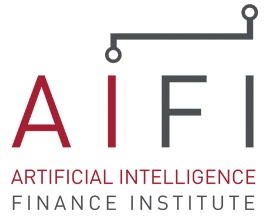


# Bootcamp - Python and Coding - Supervised Machine Learning


# About this Notebook


[Dummy Estimator](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.dummy) in scikit-learn is a simple tool used for creating baseline models. The concept behind a dummy estimator is to provide a simple comparison to actual machine learning models by using simple rules or strategies. This can help in understanding the baseline performance one should expect before applying more complex models to a problem, essentially serving as a benchmark.

The Dummy Estimator can be used for both classification and regression tasks. In classification, it might use strategies such as predicting the most frequent class in the training data, predicting a random class, or predicting a constant class specified by the user. For regression tasks, it might predict the mean or median of the training targets, predict a constant value, or generate predictions based on a random distribution with the same mean and standard deviation as the training targets. 

- __Classes:__ In scikit-learn, these are implemented through DummyClassifier for classification tasks and DummyRegressor for regression tasks.
- __Strategies:__ Different strategies can be employed depending on the type of problem (classification or regression) and the desired approach for generating baseline predictions.

# Imports

In [1]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
# Fetch Apple's stock prices
aapl = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Prepare the dataset
# We use the closing price as the feature to predict the next day's closing price
X = aapl['Close'].shift(1).dropna()  # Features (previous day's close)
y = aapl['Close'][1:]                # Target (next day's close)


[*********************100%***********************]  1 of 1 completed


# Prepare data

In [3]:
X = X.values.reshape(-1, 1)  # Reshaping for sklearn compatibility

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)




# Setup Dummy Regressor and make predictions

In [4]:
# Use DummyRegressor as a baseline model
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)

# Making predictions
y_pred = dummy_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Setup Linear Regression and make predictions

In [5]:
# Initialize and fit Linear Regression
lr_price_model = LinearRegression()
lr_price_model.fit(X_train, y_train)

# Predict on the test set
predictions_price_lr = lr_price_model.predict(X_test)

# Evaluate the model
mse_price_lr = mean_squared_error(y_test, predictions_price_lr)


# Evaluate Dummy Regressor vs. Linear Regression 

In [6]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {mse_price_lr}")

Mean Squared Error: 923.2199260293129
Mean Squared Error: 6.294697971479853


# Plot differences

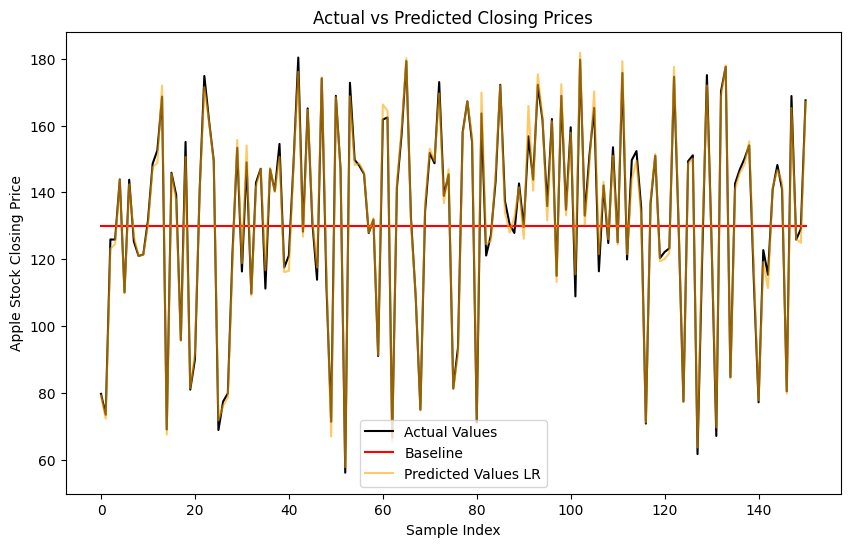

In [7]:
# Plotting the true values vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, color='black', label='Actual Values')
plt.plot(range(len(y_pred)), y_pred, color='red', label='Baseline')
plt.plot(range(len(predictions_price_lr)), predictions_price_lr, color='orange', label='Predicted Values LR', alpha=0.6)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Sample Index')
plt.ylabel('Apple Stock Closing Price')
plt.legend()
plt.show()
